In [231]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from os import system

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#Build the model with the best hyper parameters
from sklearn.model_selection import cross_val_score
#importing the zscore for scaling
from scipy.stats import zscore
#Importing PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA

#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV

import warnings; warnings.filterwarnings('ignore')

# Data Exploration / Cleaning / Wrangling

In [232]:
#Reading data
vehicle_data = pd.read_csv('vehicle.csv')
df_orig = pd.DataFrame(vehicle_data)

#Creating copy and maintain the original dataset
df = df_orig.copy()
df.info()

print("Shape of data is - ",np.shape(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

- We notice the curse of dimensionality. Very few records are given and more attribute combinations are possible which wouldn't be captured in the dataset. 
- Datatype of each attribute is listed. All are numeric except class which is the target attribute.
- There are 19 attributes of which 1 is class and 846 records

In [109]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [110]:
df.describe().T #include = 'all'

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


- The count tells us that there are missig values in many columns. 

In [233]:
columns = df.loc[:, df.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Total values count for following categories in {cols} is \n{df[cols].value_counts()}\n')

Total values count for following categories in class is 
car    429
bus    218
van    199
Name: class, dtype: int64



In [234]:
df['class'].value_counts(normalize = True)*100

car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64

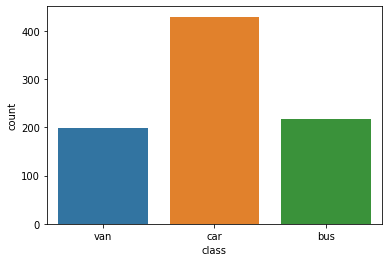

In [235]:
sns.countplot(df['class'])

- We observe the class attribute has more number of car (50.7%), van and bus constitute of another 49.3% of data. We can say it's a class imbalance.

In [236]:
# Replace values in some of the categorical columns
# Rest will be One hot encoded. 
replace_values = {'class': {'bus': 1, 'van': 2, 'car': 3}}
df = df.replace(replace_values)

In [237]:
#Checking for missing values
df.isna().apply(pd.value_counts)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
False,846.0,841,842,840,844,846.0,845,845,843,846.0,843,844,844,842,840,845,845,846.0,846.0
True,NaN,5,4,6,2,NaN,1,1,3,NaN,3,2,2,4,6,1,1,NaN,NaN


- We observe that there are null values present in many columns where TRUE indicates presence of null values and the count represents the number of missing values in that attribute.

In [238]:
#Display records having null values
df[df.isna().any(axis=1)]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,1
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,3
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,3
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,2
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,1
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,3
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,3
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,1
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,3
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,1


- We will replace the null in the columns with the median values of the attribute.

In [239]:
print("The following are the median values of given attribues: "),df.median()

The following are the median values of given attribues: 


(None, compactness                     93.0
 circularity                     44.0
 distance_circularity            80.0
 radius_ratio                   167.0
 pr.axis_aspect_ratio            61.0
 max.length_aspect_ratio          8.0
 scatter_ratio                  157.0
 elongatedness                   43.0
 pr.axis_rectangularity          20.0
 max.length_rectangularity      146.0
 scaled_variance                179.0
 scaled_variance.1              363.5
 scaled_radius_of_gyration      173.5
 scaled_radius_of_gyration.1     71.5
 skewness_about                   6.0
 skewness_about.1                11.0
 skewness_about.2               188.0
 hollows_ratio                  197.0
 class                            3.0
 dtype: float64)

In [241]:
#Replacing Nan with the median value for that particular column.
#Using lambda function to replace Nan by median in all columns. We could also use imputer.

medianFiller = lambda x: x.fillna(x.median())
df_refined = df.apply(medianFiller,axis=0)
df_refined[df_refined.isna().any(axis=1)]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


- We have replaced all the null values with the median of that particualar column. 

In [242]:
df_refined.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


- This wouln't change the median but will affect the mean value and we can observe minimal increase in mean.

# Multivariate analysis

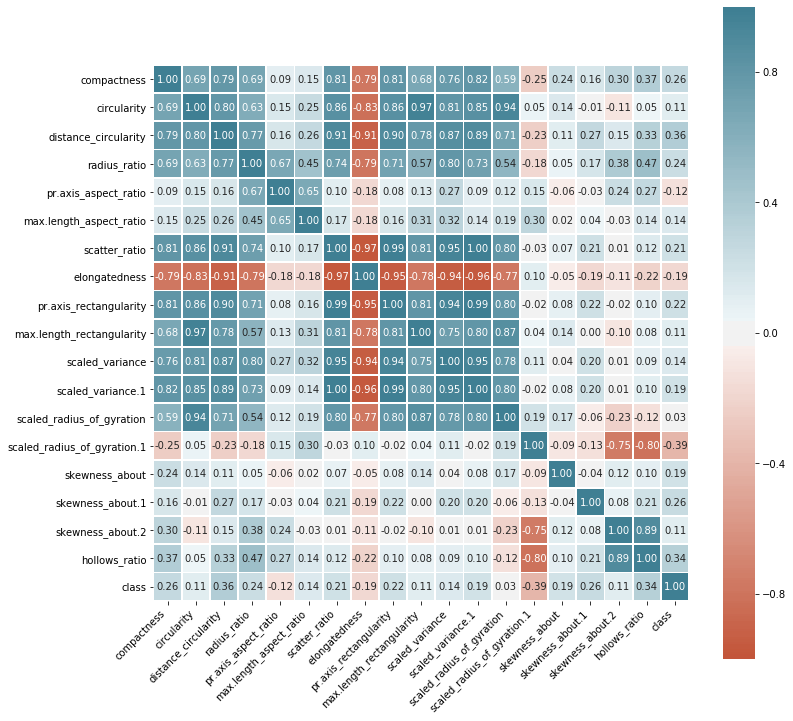

In [120]:
corr = df_refined.corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, fmt='.2f', annot_kws={'size': 10},
    linewidths=0.8
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Univariate Analysis

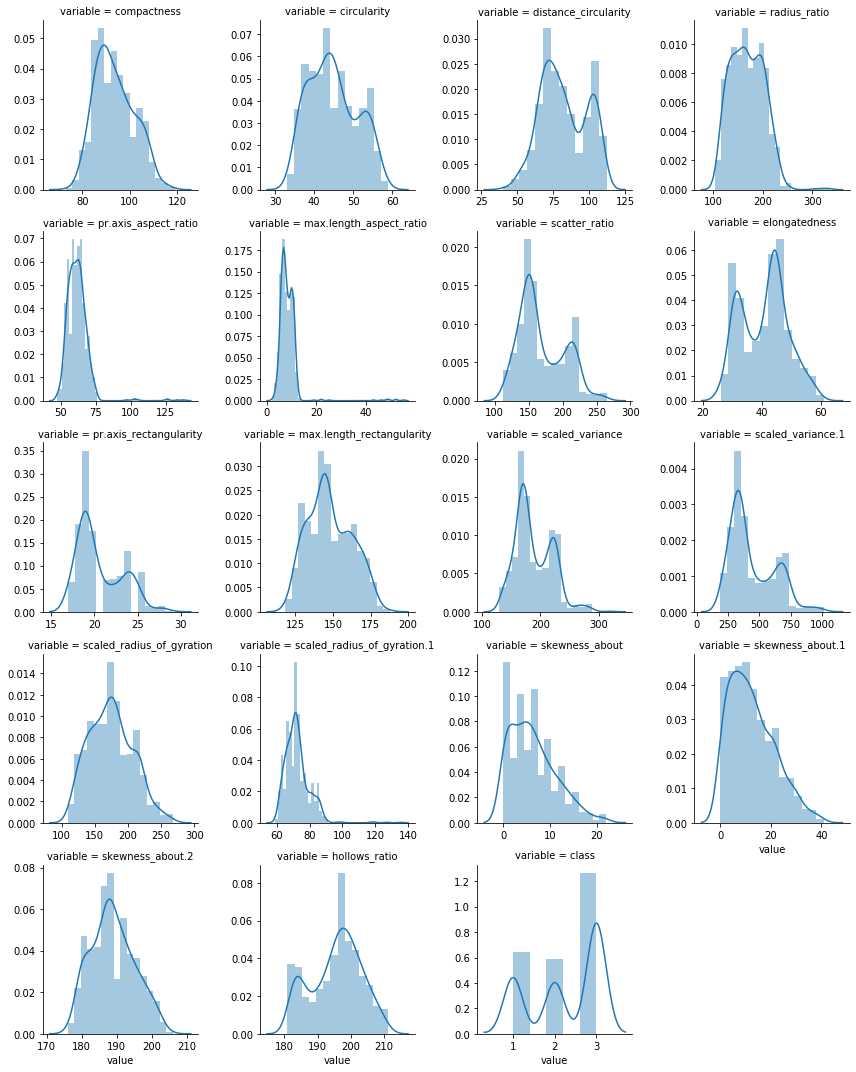

In [243]:
#create numeric plots
num = [f for f in df_refined.columns if df_refined.dtypes[f] != 'object']
nd = pd.melt(df_refined, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

- Compactness, scaled radius of gyration and skewness_about.2 are almost normally distributed. 
- pr.axis_aspect_ratio, max_length_aspect_ratio and scaled_radius_of_gyration.1 have long tails which represents outliers too. 
- We see 6 attributes with minimum 2 peaks. 

In [105]:
#def boxplot(x,y,**kwargs):
#            sns.boxplot(x=x,y=y)
#            x = plt.xticks(rotation=90)
#
#cat = [f for f in train.columns if train.dtypes[f] == 'object']
#
#p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
#g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
#g = g.map(boxplot, 'value','SalePrice')
#g

In [244]:
df.skew()

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
class                         -0.496367
dtype: float64

- We observe high skewness for pr.axis_aspect_ratio, max_length_aspect_ratio and scaled_radius_of_gyration.1 like mentioned earlier.
- hollows_ratio is negative which means it has more data on the right. Hence left skewed.

# Checking for outliers

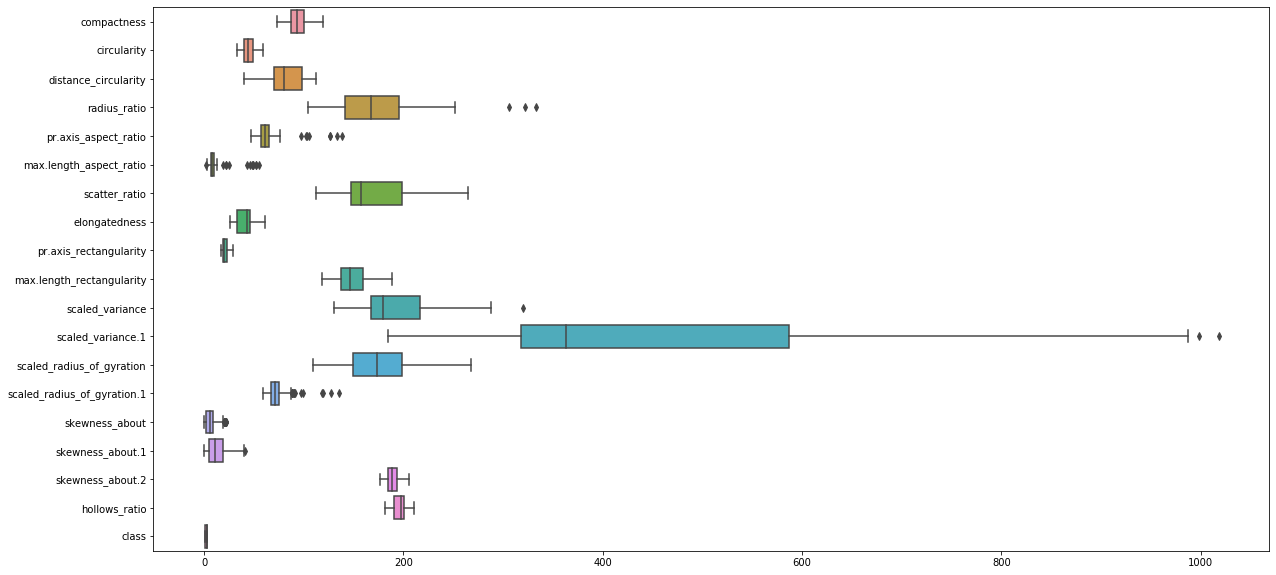

In [76]:
img = plt.figure(figsize = (20,10))
sns.boxplot(data = df_refined, orient = 'h')

In [245]:
#find the outliers and replace them by median
for col_name in df_refined.columns[:-1]:
    q1 = df_refined[col_name].quantile(0.25)
    q3 = df_refined[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    df_refined.loc[(df_refined[col_name] < low) | (df_refined[col_name] > high), col_name] = df_refined[col_name].median()

- Used quantile method to check outliers in these column. It appears that scaled_radius_of_gyration.1 has maximum outliers around 15 of them, which represents about 1.77% of number of rows.

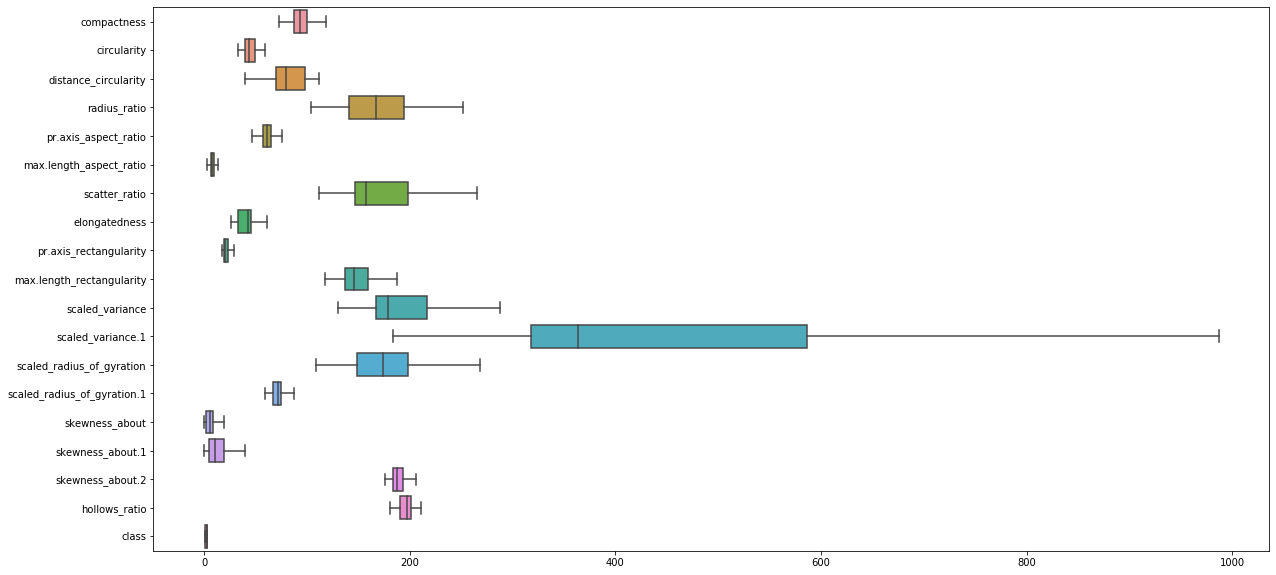

In [83]:
img = plt.figure(figsize = (20,10))
sns.boxplot(data = df_refined, orient = 'h')

In [87]:
df_refined.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [246]:
# Absolute correlation of independent variables with 'Target' i.e. the target variable
absCorrwithDep = []
allVars = df_refined.drop('class', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(df_refined['class'].corr(df_refined[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
5,max.length_aspect_ratio,0.458742
13,scaled_radius_of_gyration.1,0.414722
2,distance_circularity,0.364003
17,hollows_ratio,0.336803
0,compactness,0.262151
3,radius_ratio,0.254056
15,skewness_about.1,0.253804
8,pr.axis_rectangularity,0.217248
6,scatter_ratio,0.210299
11,scaled_variance.1,0.206503


- We will dorp last 4 columns since there is barely any correlation.


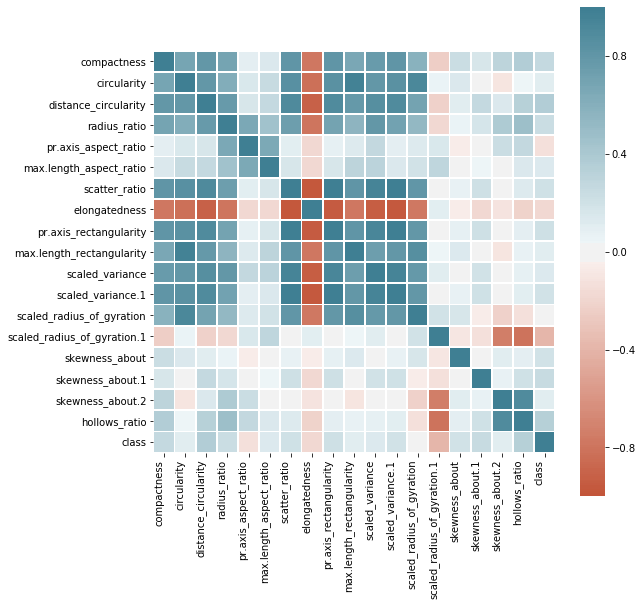

In [171]:
corr = df_refined.corr()
plt.figure(figsize=(9,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
   # annot=True, fmt='.2f', #annot_kws={'size': 10},
    linewidths=0.8
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    #rotation=45,
    horizontalalignment='right'
);

- compactness has positive linear relationship with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance1, scaled_variance. compactness has negative linear relationship with elongatedness.
- circularity has positive linear relationship with distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. circularity has negative linear relationship with elongatedness.
- distance_circularity has positive linear relationship with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. distance_circularity has negative linear relationship with elongatedness.
- radius_ratio has positive linear relationship with pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration. radius_ratio has negative linear relationship with elongatedness

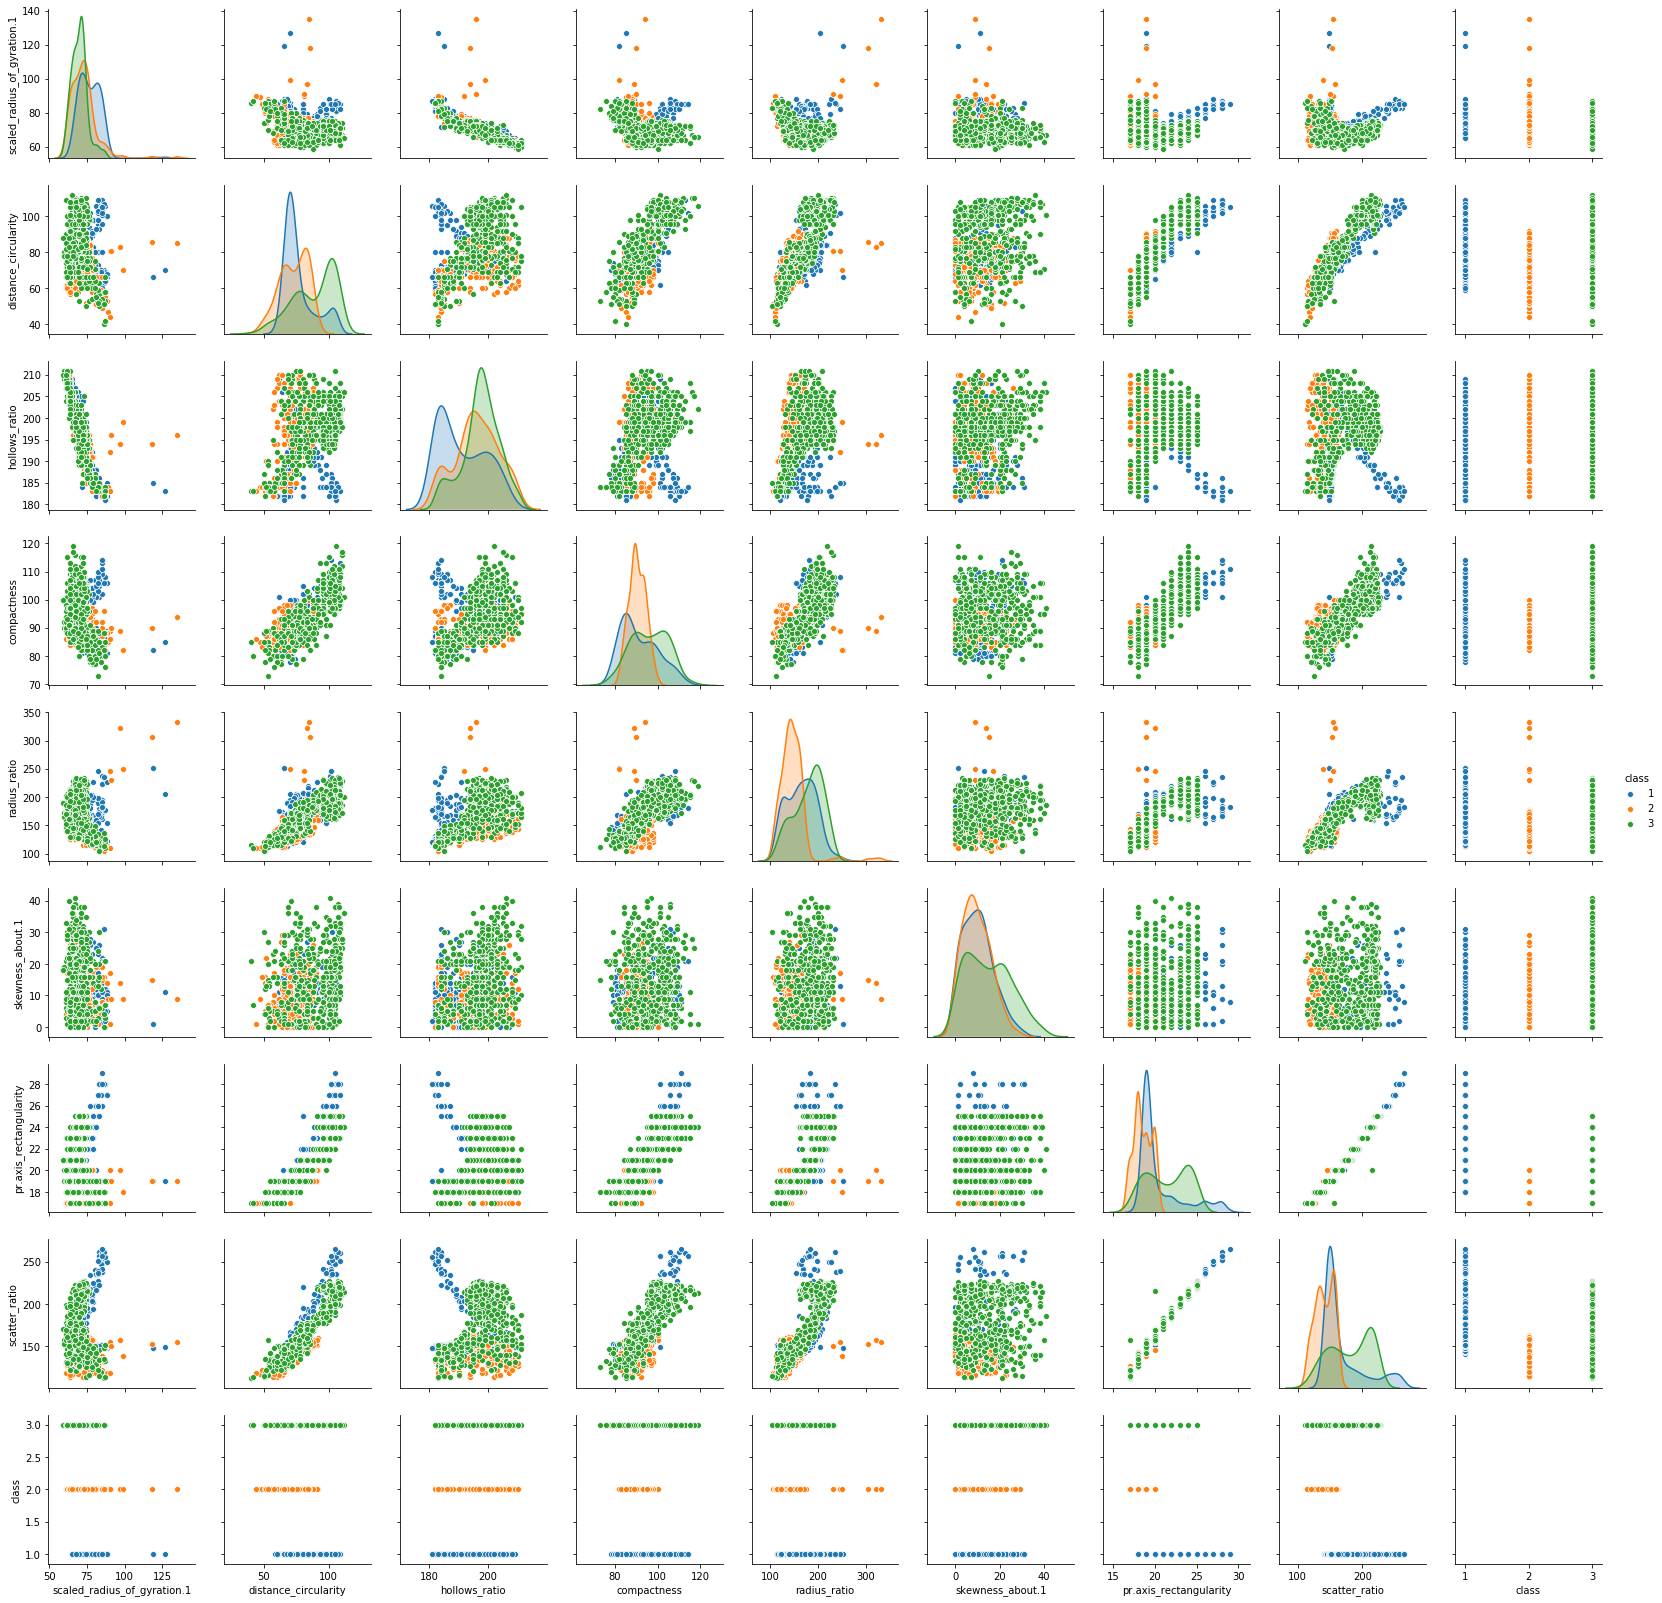

In [227]:
sns.pairplot(df_refined[['scaled_radius_of_gyration.1', 'distance_circularity', 'hollows_ratio', 
             'compactness', 'radius_ratio', 'skewness_about.1','pr.axis_rectangularity','scatter_ratio','class']], hue = 'class')

- It is also showing the same information as correlation matrix.


# Split data in 70:30 using train_test_split

In [247]:
df_ml = df_refined.copy()

X_data = df_ml.drop(columns=["class"])
Y_target = df_ml["class"]

random_state = 9
np.random.seed(random_state)

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_target,
                                                    test_size=0.3, random_state = random_state)

In [249]:
y_test.value_counts()

3    137
1     63
2     54
Name: class, dtype: int64

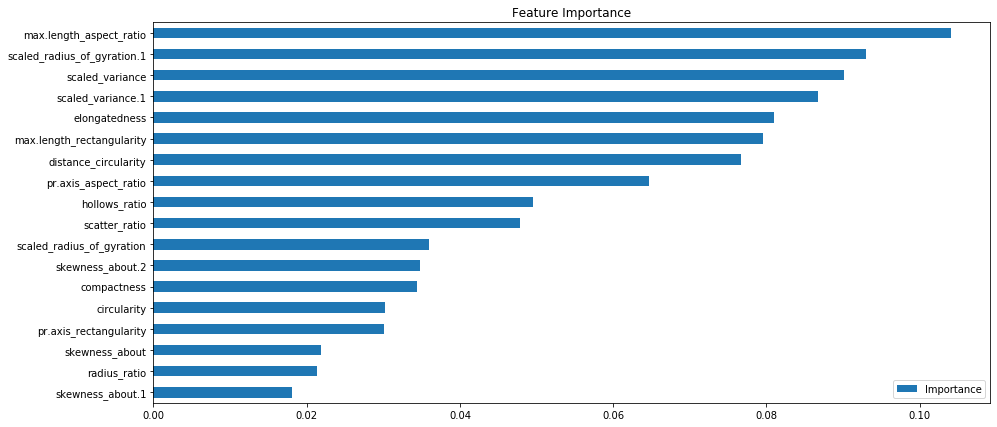

In [250]:
# Feature Importance plot using Random Forest Classifier
rf = RandomForestClassifier().fit(X_train, y_train)
pd.DataFrame(rf.feature_importances_, index = df_ml.columns[:-1], 
             columns=['Importance']).sort_values('Importance').plot(kind='barh', figsize=(15,7), title='Feature Importance')

- We come to know which attributes are of importance. Hence from all the above analysis we are ready to drop some arrtibutes of less importance which are also not much correlated with the target variable. 

In [251]:
X_data = df_ml.drop(columns=["class","skewness_about.2","max.length_rectangularity","scaled_radius_of_gyration","circularity"])
Y_target = df_ml["class"]

random_state = 9
np.random.seed(random_state)

X_train, X_test, y_train, y_test = train_test_split(X_data,Y_target,
                                                    test_size=0.3, random_state = random_state)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

- PCA is effected by scale so we need to scale the features in our data before applying PCA

# Support Vector Classifier

In [252]:
SVC_Algo = SVC(C =1, kernel = 'linear', random_state = random_state)

#Train the model using the training sets
SVC_Algo.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVC_Algo.predict(X_test)

print('Training Score: ', SVC_Algo.score(X_train, y_train).round(3))
print('Test Score: ', SVC_Algo.score(X_test, y_test).round(3))

# Model Accuracy, how often is the classifier correct?
print("Accuracy",metrics.accuracy_score(y_test, y_pred))

#Checking performance our model with ROC Score.
#roc_score = roc_auc_score(y_test, y_pred)
#print("ROC: ",roc_score)

# Print Classification Report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
# Print Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Training Score:  0.91
Test Score:  0.909
Accuracy 0.9094488188976378
              precision    recall  f1-score   support

           1       0.85      0.98      0.91        63
           2       0.84      0.91      0.88        54
           3       0.98      0.88      0.92       137

    accuracy                           0.91       254
   macro avg       0.89      0.92      0.90       254
weighted avg       0.92      0.91      0.91       254

[[ 62   0   1]
 [  3  49   2]
 [  8   9 120]]


In [272]:
model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}
model1 = GridSearchCV(model, param_grid=params, verbose=5)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.809, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.858, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.857, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.492, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.492, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.495, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.874, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.893, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.918, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.910, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.919, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.934, total=   0.0s
Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


In [279]:
#Build the model with the best hyper parameters
model = SVC(C=1, kernel="rbf")
scores = cross_val_score(model, X_train, y_train, cv=10)
print(scores)
print(np.mean(scores))

[0.95081967 0.83606557 0.93333333 0.95       0.95       0.9137931
 0.93103448 0.9137931  0.94827586 0.93103448]
0.9258149613717732


# PCA

In [255]:
# Calculating the covariance between attributes after scaling
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00169205  0.78960234  0.73652587  0.20886369  0.50926108  0.81495173
  -0.78960014  0.81689923  0.78272418  0.80963747 -0.25774177  0.17643286
   0.18073655  0.37259928]
 [ 0.78960234  1.00169205  0.79014373  0.23288536  0.67560936  0.90502182
  -0.90985293  0.8918132   0.87281497  0.88216875 -0.23935301  0.08575165
   0.28360548  0.33682711]
 [ 0.73652587  0.79014373  1.00169205  0.64868746  0.45120066  0.77749693
  -0.82839247  0.7509132   0.79846413  0.76656852 -0.38672129  0.04021536
   0.20996239  0.48334134]
 [ 0.20886369  0.23288536  0.64868746  1.00169205  0.10984768  0.1998223
  -0.29799186  0.16547149  0.22353952  0.19976434 -0.30645287 -0.02103949
   0.00591731  0.40472951]
 [ 0.50926108  0.67560936  0.45120066  0.10984768  1.00169205  0.5015702
  -0.51215906  0.50065642  0.4113083   0.46927681 -0.35169246  0.08306479
   0.14888204  0.43537083]
 [ 0.81495173  0.90502182  0.77749693  0.1998223   0.5015702   1.00169205
  -0.97620476  0.99338733  0.97

In [256]:
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.31323653  0.03083205  0.13518994 -0.10998083  0.02921642 -0.32170145
   0.83712953  0.16713023  0.13141318  0.01042843  0.01302034  0.12784434
  -0.0535672   0.02711169]
 [ 0.3414473   0.00450601  0.11011897  0.0423563   0.09546199  0.1120071
  -0.25238472  0.28828765  0.80860665  0.03667383  0.01132651 -0.2131031
   0.01420842  0.00860321]
 [ 0.31776918  0.16662832 -0.2739816  -0.09950766 -0.13656741  0.00532848
  -0.06889855  0.4014569  -0.36449193  0.45280351 -0.00147062 -0.37185799
   0.02138074  0.35365706]
 [ 0.12247782  0.30136863 -0.62431757 -0.24888358 -0.30619445  0.41630208
   0.1649683  -0.08386884  0.15223013 -0.27446326 -0.00603788  0.12804973
   0.01696164 -0.1610115 ]
 [ 0.21842602  0.17952311  0.32516332  0.06884758  0.47727089  0.69982724
   0.14404929  0.02948107 -0.24588977  0.02311155  0.00500208  0.0517568
  -0.04741067 -0.06691692]
 [ 0.34616208 -0.16814602  0.00208824  0.00242734  0.00457429 -0.04207345
  -0.08197248 -0.16104254 -0.0757774

Cumulative Variance Explained [ 55.13095745  71.47717414  79.48924272  86.85682827  92.7043472
  96.18734607  97.73287186  98.45614374  98.97094835  99.39487273
  99.65648041  99.84064762  99.97615589 100.        ]


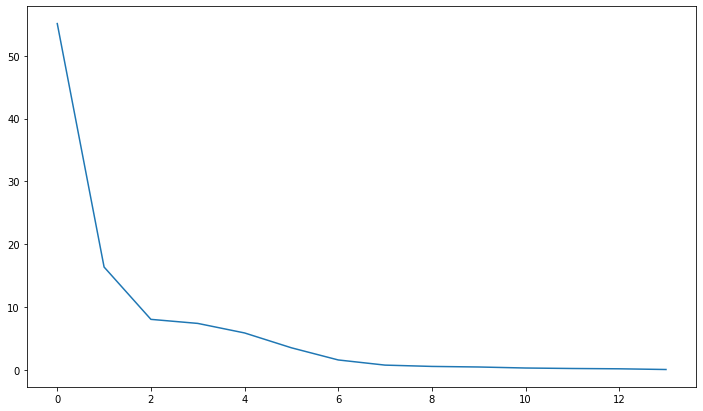

In [257]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.figure(figsize=(12 , 7))
plt.plot(var_exp)

- The major elbow falls somewhere close to 5 but we will capture 6 or 7 attributes.

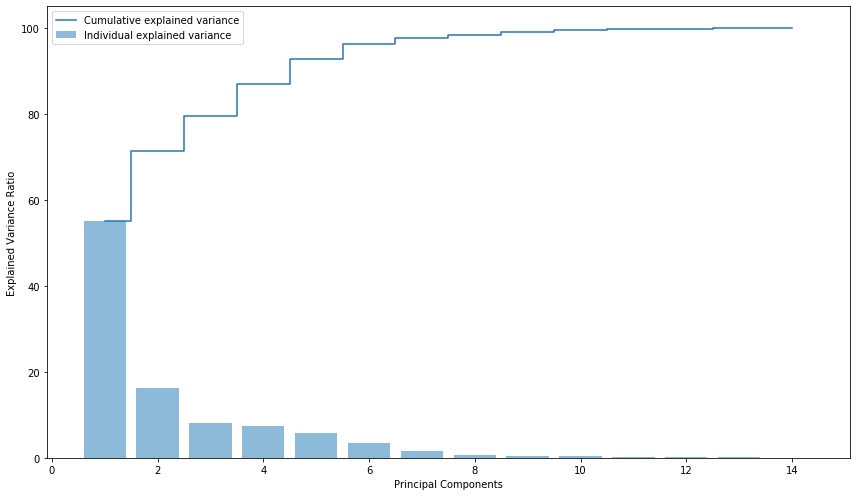

In [258]:
# Ploting 
plt.figure(figsize=(12 , 7))
#plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
#plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [259]:
# Reducing the dimensions from 14 to 6
pca = PCA(n_components = 7, random_state = random_state)
pca.fit(X_train)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)
display(X_train_reduced.shape, X_test_reduced.shape)

(592, 7)

(254, 7)

In [260]:
pca.components_

array([[-3.13145902e-01, -3.48845813e-01, -3.19213548e-01,
        -1.24465090e-01, -2.15715149e-01, -3.47554419e-01,
         3.51259372e-01, -3.42862186e-01, -3.32731394e-01,
        -3.42888068e-01,  7.13294576e-02, -4.87132529e-02,
        -6.28744215e-02, -1.22049977e-01],
       [ 6.96648139e-04, -3.71529677e-03, -2.05049520e-01,
        -3.64405080e-01, -1.73267504e-01,  1.65098879e-01,
        -7.95753569e-02,  1.77356371e-01,  1.78161988e-01,
         1.56519521e-01,  5.83106645e-01,  8.73502832e-02,
        -4.81713303e-02, -5.69103323e-01],
       [ 1.97403378e-01,  6.61604299e-02, -2.03695419e-01,
        -5.15129571e-01,  1.66664478e-01, -2.89376802e-02,
         7.38759113e-02, -1.36317237e-02, -8.76923731e-02,
        -2.67284452e-02, -2.00587250e-01,  6.45162583e-01,
         3.54544897e-01,  1.58019125e-01],
       [-1.11727873e-01,  5.46705086e-02, -5.31238340e-02,
        -1.67814627e-01,  2.15751235e-02,  2.16010003e-02,
         1.80807708e-02,  2.69652037e-02,  3.

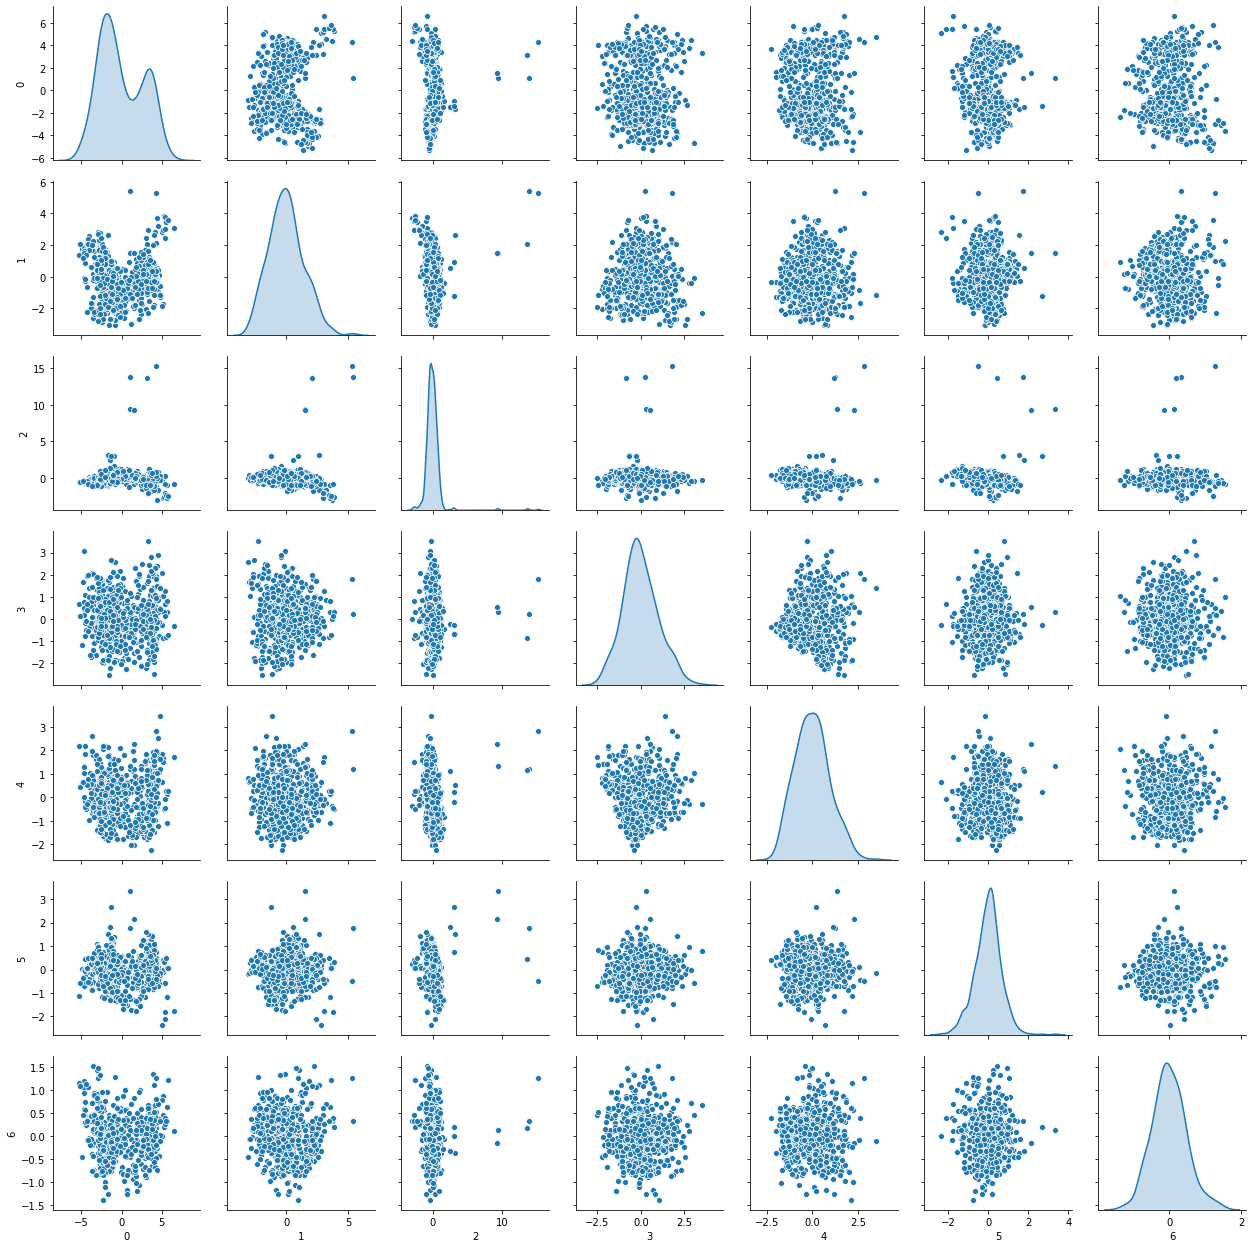

In [222]:
sns.pairplot(pd.DataFrame(X_train_reduced), diag_kind = 'kde')

In [276]:
SVC_Algo = SVC(C =0.01, kernel = 'rbf', random_state = random_state)

#Train the model using the training sets
SVC_Algo.fit(X_train_reduced, y_train)

#Predict the response for test dataset
y_pred = SVC_Algo.predict(X_test_reduced)

print('Training Score: ', SVC_Algo.score(X_train_reduced, y_train).round(3))
print('Test Score: ', SVC_Algo.score(X_test_reduced, y_test).round(3))

# Model Accuracy, how often is the classifier correct?
print("Accuracy",metrics.accuracy_score(y_test, y_pred))

#Checking performance our model with ROC Score.
#roc_score = roc_auc_score(y_test, y_pred)
#print("ROC: ",roc_score)

# Print Classification Report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
# Print Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Training Score:  0.493
Test Score:  0.539
Accuracy 0.5393700787401575
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        63
           2       0.00      0.00      0.00        54
           3       0.54      1.00      0.70       137

    accuracy                           0.54       254
   macro avg       0.18      0.33      0.23       254
weighted avg       0.29      0.54      0.38       254

[[  0   0  63]
 [  0   0  54]
 [  0   0 137]]


In [309]:
# Creating a dimension reduced with features and target
df_train = pd.DataFrame(X_train_reduced).join(pd.DataFrame(y_train, columns = ['class']), how = 'left', sort = False)
df_test = pd.DataFrame(X_test_reduced).join(pd.DataFrame(y_test, columns = ['class']), how = 'left', sort = False)
df_train.shape, df_test.shape

((592, 8), (254, 8))

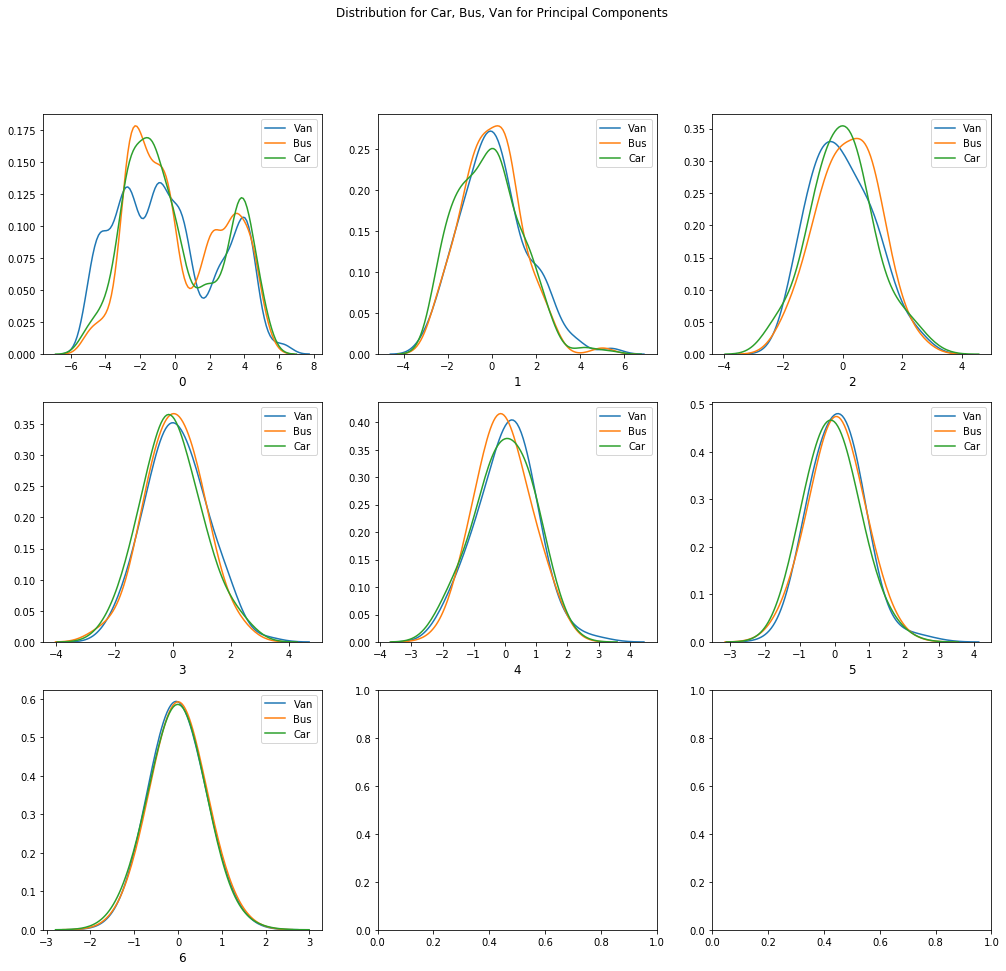

In [320]:
features = [f for f in df_train.columns if f not in ['class']]

i = 0
t1 = df_train[df_train['class'] == 1]
t2 = df_train[df_train['class'] == 2]
t3 = df_train[df_train['class'] == 3]

fig, ax = plt.subplots(3,3, figsize = (17,15))
fig.suptitle('Distribution for Car, Bus, Van for Principal Components', fontsize = 12)

for feature in features:
    i += 1
    plt.subplot(3, 3, i)
    sns.kdeplot(t1[feature], bw = 0.5, label = 'Van')
    sns.kdeplot(t2[feature], bw = 0.5, label = 'Bus')
    sns.kdeplot(t3[feature], bw = 0.5, label = 'Car')
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.show()

In [277]:
model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}
model1 = GridSearchCV(model, param_grid=params, verbose=5)
model1.fit(X_train_reduced, y_train)
print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.804, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.832, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.842, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.492, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.492, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.495, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.852, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.899, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.909, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.923, total=   0.0s
Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


In [278]:
#Build the model with the best hyper parameters
model = SVC(C=0.5, kernel="rbf")
scores = cross_val_score(model, X_train_reduced, y_train, cv=10)
print(scores)
print(np.mean(scores))

[0.95081967 0.85245902 0.9        0.95       0.93333333 0.89655172
 0.9137931  0.89655172 0.96551724 0.93103448]
0.9190060297719992


## Conclusion

- Post data preparation and analysis, we've dropped some attributes of least importance and the ones which were not correlated with the class attribute. 



- Further we trained Support Vector Classifier with 14 attributes instead of 18. The accuracy of the model was 92.5% and the cross validation score was 92%



- The best param for SVC using grid search - C as 1 and Kernal as rbf (without PCA)
- After applying PCA the best param were - C as 0.5 and Kearnal as rbf.



- Then we applied PCA technique to reduce the dimensionality curse. Task was to select those features which explain 95% of variance. So we used to elbow method and decided to keep 7 attributes out of 14. It surely improves the performance. But we have some loss of data too which leads to reduce in accuracy. 
- Also, the new features generated using this teachnique has less interpretablility.



- We used Support vector classifier on the PCA, ie, reduced attributes which were of high importance. The accuracy of the model recorded was 53% and the cross validation score was 91.9%



- The accuracy dropped too much after reducing the features and the cross validation score reduced less than 1%.  